# IBGE Data Analysis - ETL Project

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('dados_ibge_mg.csv',skiprows=[0,856,857])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 14 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Munic&iacute;pio [-]                                                                    853 non-null    object 
 1   C&oacute;digo [-]                                                                       853 non-null    int64  
 2   Gent&iacute;lico [-]                                                                    853 non-null    object 
 3   Prefeito [2021]                                                                         853 non-null    object 
 4   &Aacute;rea Territorial - km&sup2; [2021]                                               853 non-null    float64
 5   Popula&ccedil;&atilde;o estimada - pessoas [2021]                      

In [61]:
df.describe()

,C&oacute;digo [-],&Aacute;rea Territorial - km&sup2; [2021],Popula&ccedil;&atilde;o estimada - pessoas [2021],Densidade demogr&aacute;fica - hab/km&sup2; [2010],Escolariza&ccedil;&atilde;o &lt;span&gt;6 a 14 anos&lt;/span&gt; - % [2010],IDHM &lt;span&gt;&Iacute;ndice de desenvolvimento humano municipal&lt;/span&gt; [2010],Receitas realizadas - R$ (&times;1000) [2017],Despesas empenhadas - R$ (&times;1000) [2017],PIB per capita - R$ [2019],Unnamed: 13
count,8.530000e+02,853.000000,8.530000e+02,853.000000,853.000000,853.000000,8.530000e+02,8.530000e+02,853.000000,0.0
mean,3.136982e+06,687.589675,2.510190e+04,65.277984,97.443494,0.667878,7.185850e+04,6.499545e+04,21386.137444,NaN
std,2.072104e+04,965.848805,1.017052e+05,310.186259,1.688276,0.049637,3.776376e+05,3.688016e+05,24512.451613,NaN
min,3.100104e+06,3.565000,7.710000e+02,1.360000,83.900000,0.529000,9.919854e+03,7.466144e+02,5984.220000,NaN
25%,3.119500e+06,196.735000,4.843000e+03,12.560000,96.700000,0.633000,1.647631e+04,1.440029e+04,11082.490000,NaN
50%,3.137304e+06,363.828000,8.288000e+03,22.520000,97.700000,0.670000,2.199549e+04,1.993433e+04,15060.990000,NaN
75%,3.154903e+06,727.894000,1.785000e+04,42.470000,98.500000,0.702000,4.403039e+04,3.912319e+04,22948.360000,NaN
max,3.172202e+06,10727.097000,2.530701e+06,7167.000000,100.000000,0.813000,1.014599e+07,1.003642e+07,313035.000000,NaN


In [62]:
df = df.dropna(axis=1)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 13 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Munic&iacute;pio [-]                                                                    853 non-null    object 
 1   C&oacute;digo [-]                                                                       853 non-null    int64  
 2   Gent&iacute;lico [-]                                                                    853 non-null    object 
 3   Prefeito [2021]                                                                         853 non-null    object 
 4   &Aacute;rea Territorial - km&sup2; [2021]                                               853 non-null    float64
 5   Popula&ccedil;&atilde;o estimada - pessoas [2021]                      

- Organização das Colunas de forma a facilitar a leitura

In [64]:
df.columns = ['Municipio', 'Codigo', 'Gentilico', 'Prefeito_[2021]', 'Area_Territorial_km2_[2021]', 
              'População_estimada_pessoas_[2021]', 'Densidade_demografica_hab/km2_[2010]',
              'Escolarização_6_a_10anos_[2010]', 'IDH_Municipal_[2010]', 
              'Mortalidade_infantil_óbitos_por_1000_vivos_[2020]',
              'Receitas_realizadas_R$_(x1000)_[2017]', 'Despesas_empenhadas_R$(x1000)_[2017]','PIB_per_capita_R$_[2019]']

In [65]:
df.columns

Index(['Municipio', 'Codigo', 'Gentilico', 'Prefeito_[2021]',
       'Area_Territorial_km2_[2021]', 'População_estimada_pessoas_[2021]',
       'Densidade_demografica_hab/km2_[2010]',
       'Escolarização_6_a_10anos_[2010]', 'IDH_Municipal_[2010]',
       'Mortalidade_infantil_óbitos_por_1000_vivos_[2020]',
       'Receitas_realizadas_R$_(x1000)_[2017]',
       'Despesas_empenhadas_R$(x1000)_[2017]', 'PIB_per_capita_R$_[2019]'],
      dtype='object')

In [66]:
df.head()

,Municipio,Codigo,Gentilico,Prefeito_[2021],Area_Territorial_km2_[2021],População_estimada_pessoas_[2021],Densidade_demografica_hab/km2_[2010],Escolarização_6_a_10anos_[2010],IDH_Municipal_[2010],Mortalidade_infantil_óbitos_por_1000_vivos_[2020],Receitas_realizadas_R$_(x1000)_[2017],Despesas_empenhadas_R$(x1000)_[2017],PIB_per_capita_R$_[2019]
0,Abadia dos Dourados,3100104,abadiense,WANDERLEI LEMES SANTOS,880.461,7022,7.61,98.3,0.689,16.39,21894.89576,18793.52389,18254.66
1,Abaet&eacute;,3100203,abaetense,IVANIR DELADIER DA COSTA,1817.067,23263,12.49,99.8,0.698,24.1,45220.32463,40774.21946,22262.55
2,Abre Campo,3100302,abre-campense,VITOR HENRIQUE MOREIRA FERREIRA DE OLIVEIRA,470.551,13434,28.29,97.4,0.654,-,32100.12090,29577.56666,15123.22
3,Acaiaca,3100401,acaiaquense,LUIZ CARLOS FAUSTINO,101.886,3995,38.47,96.0,0.630,-,14072.55633,12445.28291,13982.58
4,A&ccedil;ucena,3100500,a&ccedil;ucenense,RAULISSON MORAIS,815.422,9270,12.60,96.7,0.610,10.64,19477.67359,19513.35699,9880.87


 - Data Cleaning :

In [67]:
df['Municipio'] =  df['Municipio'].str.replace('&',"").str.replace('acute;',"").str.replace('tilde;',"")

In [68]:
df['Municipio'] = df['Municipio'].str.replace('ccedil;',"ç").str.replace('circ;',"")

In [69]:
df['Gentilico'] = df['Gentilico'].str.replace('&',"").str.replace('acute;',"")

In [70]:
df['Gentilico'] = df['Gentilico'].str.replace('ccedil;',"ç").str.replace('circ;',"").str.replace('tilde;',"")

In [71]:
df['Prefeito_[2021]'] = df['Prefeito_[2021]'].str.replace('&',"").str.replace('tilde;',"").str.replace('acute;',"")

In [72]:
df['Prefeito_[2021]'] = df['Prefeito_[2021]'].str.replace('ccedil;',"ç").str.replace('circ;',"")

In [73]:
df.head()

,Municipio,Codigo,Gentilico,Prefeito_[2021],Area_Territorial_km2_[2021],População_estimada_pessoas_[2021],Densidade_demografica_hab/km2_[2010],Escolarização_6_a_10anos_[2010],IDH_Municipal_[2010],Mortalidade_infantil_óbitos_por_1000_vivos_[2020],Receitas_realizadas_R$_(x1000)_[2017],Despesas_empenhadas_R$(x1000)_[2017],PIB_per_capita_R$_[2019]
0,Abadia dos Dourados,3100104,abadiense,WANDERLEI LEMES SANTOS,880.461,7022,7.61,98.3,0.689,16.39,21894.89576,18793.52389,18254.66
1,Abaete,3100203,abaetense,IVANIR DELADIER DA COSTA,1817.067,23263,12.49,99.8,0.698,24.1,45220.32463,40774.21946,22262.55
2,Abre Campo,3100302,abre-campense,VITOR HENRIQUE MOREIRA FERREIRA DE OLIVEIRA,470.551,13434,28.29,97.4,0.654,-,32100.12090,29577.56666,15123.22
3,Acaiaca,3100401,acaiaquense,LUIZ CARLOS FAUSTINO,101.886,3995,38.47,96.0,0.630,-,14072.55633,12445.28291,13982.58
4,Açucena,3100500,açucenense,RAULISSON MORAIS,815.422,9270,12.60,96.7,0.610,10.64,19477.67359,19513.35699,9880.87


- Uso do conceito de engenharia de dados para estimar a densidade demográfica atual

In [74]:
df['Densidade_demografica_estimada_[2021]_hab/km2'] = df['População_estimada_pessoas_[2021]'] / df['Area_Territorial_km2_[2021]']

In [75]:
df[['Densidade_demografica_hab/km2_[2010]', 'Densidade_demografica_estimada_[2021]_hab/km2']].head()

,Densidade_demografica_hab/km2_[2010],Densidade_demografica_estimada_[2021]_hab/km2
0,7.61,7.975367
1,12.49,12.802500
2,28.29,28.549509
3,38.47,39.210490
4,12.60,11.368347


- Análise da correlação entre IDH, PIB per capita, Receita Municipal e Escolarização

  - Nota:  Devido ao último censo ter sido realizado em 2010, alguns dados estão desatualizados.

In [76]:
df[['IDH_Municipal_[2010]', 'Receitas_realizadas_R$_(x1000)_[2017]', 
    'PIB_per_capita_R$_[2019]', 'Escolarização_6_a_10anos_[2010]']].corr()

,IDH_Municipal_[2010],Receitas_realizadas_R$_(x1000)_[2017],PIB_per_capita_R$_[2019],Escolarização_6_a_10anos_[2010]
IDH_Municipal_[2010],1.000000,0.247314,0.347486,0.313377
Receitas_realizadas_R$_(x1000)_[2017],0.247314,1.000000,0.109842,0.023261
PIB_per_capita_R$_[2019],0.347486,0.109842,1.000000,0.104434
Escolarização_6_a_10anos_[2010],0.313377,0.023261,0.104434,1.000000


In [77]:
corr = df[['IDH_Municipal_[2010]', 'Receitas_realizadas_R$_(x1000)_[2017]', 'PIB_per_capita_R$_[2019]', 'Escolarização_6_a_10anos_[2010]']].corr()

<AxesSubplot:>

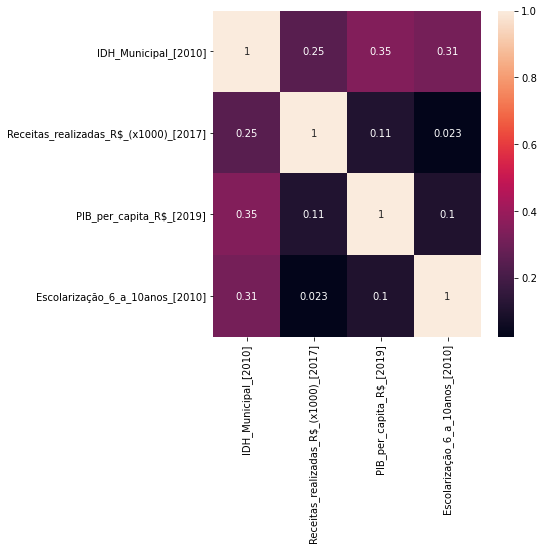

In [78]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot= True)

- Etapa de carregamento dos dados no PostgreSQL

In [79]:
import psycopg2 as pg2
from io import StringIO

In [80]:
param_dic = {
    "host"      : "localhost",
    "database"  : "ibge_database",
    "user"      : "postgres",
    "password"  : "your_password"
}

In [81]:
conn = pg2.connect(database=param_dic['database'], user = param_dic['user'], password=param_dic['password'])

In [84]:
columns_order = [ 'Codigo','Municipio', 'Gentilico', 'Prefeito_[2021]',
       'Area_Territorial_km2_[2021]', 'População_estimada_pessoas_[2021]',
       'Densidade_demografica_hab/km2_[2010]',
       'Escolarização_6_a_10anos_[2010]', 'IDH_Municipal_[2010]',
       'Mortalidade_infantil_óbitos_por_1000_vivos_[2020]',
       'Receitas_realizadas_R$_(x1000)_[2017]',
       'Despesas_empenhadas_R$(x1000)_[2017]', 'PIB_per_capita_R$_[2019]',
       'Densidade_demografica_estimada_[2021]_hab/km2']

In [85]:
colunas_sql = ("Codigo integer PRIMARY KEY, Municipio varchar, Gentilico varchar, Prefeito_2021 varchar,"+
          " Area_Territorial_km2_2021 numeric, População_estimada_pessoas_2021 integer,"+
          " Densidade_demografica_hab_km2_2010 numeric, Escolarização_6_a_10anos_2010 numeric,"+
          " IDH_Municipal_2010 numeric, Mortalidade_infantil_óbitos_por_1000_vivos_2020 varchar,"+
          " Receitas_realizadas_R$_x1000_2017 numeric, Despesas_empenhadas_R$_x1000_2017 numeric, "+
          " PIB_per_capita_R$_2019 numeric, Densidade_demografica_estimada_2021_hab_km2 numeric")

In [86]:
table = 'dados_ibge_mg'

- Funções para criar uma tabela no PostgreSQl e Salvar os dados no database

In [89]:
def create_table(tabela, colunas):
    """ Cria uma tabela no PosgreSQL"""
    cursor = conn.cursor()
    
    try:
        cursor.execute(f"CREATE TABLE {tabela} ({colunas});")
        conn.commit()
    except (Exception, psycopg2.Databaseerror) as error:
        print("Error: %s" %error)
        conn.rollback()
        cursor.close()
        return 1
    cursor.close()
    
    
def copy_from_stringio(conn, df, table, columns_order):
    ''' Salva o dataframe na memoria e usa copy_from() para copiar os dados para tabela ''' 
    buffer = StringIO()
    df.to_csv(buffer, index_label='Codigo', header=False,index=False, columns=columns_order)
    buffer.seek(0)
    
    cursor = conn.cursor()
    
    try:
        cursor.copy_from(buffer, table, sep=",")
        conn.commit()
    except (Exception, pg2.DatabaseError) as error:
        print("Error: %s" %error)
        conn.rollback()
        cursor.close()
        return 1
    
    print("copy from StringIO done")
    cursor.close()    
    

In [90]:
create_table(table, colunas_sql)

In [91]:
copy_from_stringio(conn,df,table,columns_order)

copy from StringIO done


In [92]:
conn.close()